<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/amazon-sentiment-analysis/blob/master/LSTM_30_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset

In [3]:
dataset=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Amazon_Instant_Video_5.json?token=AIJPU64KFFGET5BHPE3UMN25ILUTA',lines=True).loc[:,['overall','reviewText']]
dataset.head()

,overall,reviewText
0,2,I had big expectations because I love English ...
1,5,I highly recommend this series. It is a must f...
2,1,This one is a real snoozer. Don't believe anyt...
3,4,Mysteries are interesting. The tension betwee...
4,5,"This show always is excellent, as far as briti..."


In [0]:
dataset2=pd.read_json('https://raw.githubusercontent.com/AnirbanMukherjeeXD/amazon-sentiment-analysis/master/dataset/Musical_Instruments_5.json?token=AIJPU64JB3LPJO2NWXOHZF25IELI6',lines=True).loc[:,['overall','reviewText']]
dataset2.head()

,overall,reviewText
0,5,"Not much to write about here, but it does exac..."
1,5,The product does exactly as it should and is q...
2,5,The primary job of this device is to block the...
3,5,Nice windscreen protects my MXL mic and preven...
4,5,This pop filter is great. It looks and perform...


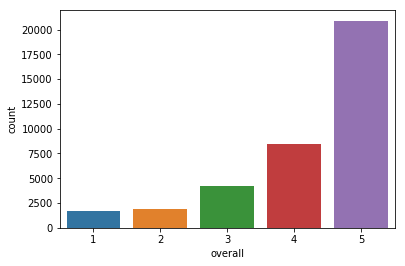

In [0]:
sns.countplot(dataset['overall'])

#Preprocessing

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X1=dataset['reviewText'].values
Y1=dataset['overall'].values

In [0]:
X2=dataset2['reviewText'].values
Y2=dataset2['overall'].values

In [0]:
X=np.append(X1.reshape(1,-1),X2.reshape(1,-1))
Y=np.append(Y1.reshape(1,-1),Y2.reshape(1,-1))

In [0]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X)

In [0]:
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [0]:
Y=Y-1
Y = to_categorical(Y)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

#Model

In [0]:
import keras 
from keras.layers import Embedding, LSTM, Bidirectional, Dense, GRU
from keras.models import Sequential

##GRU

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(GRU(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

W0725 13:46:29.297167 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 13:46:29.340510 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 13:46:29.346644 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 13:46:29.580720 140127134537600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 13:46:29.587671 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2440, 128)         320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                14310     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 155       
Total params: 334,465
Trainable params: 334,465
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2,batch_size=500)

W0725 13:46:33.480176 140127134537600 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30327 samples, validate on 7582 samples
Epoch 1/10
30327/30327 [==============================] - 235s 8ms/step - loss: 1.2922 - acc: 0.5693 - val_loss: 1.1140 - val_acc: 0.5840
Epoch 2/10
30327/30327 [==============================] - 230s 8ms/step - loss: 1.0800 - acc: 0.5878 - val_loss: 1.0527 - val_acc: 0.5876
Epoch 3/10
30327/30327 [==============================] - 230s 8ms/step - loss: 1.0167 - acc: 0.6000 - val_loss: 1.0111 - val_acc: 0.5942
Epoch 4/10
11500/30327 [==========>...................] - ETA: 2:09 - loss: 0.9733 - acc: 0.6168

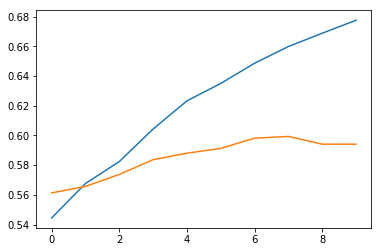

In [0]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

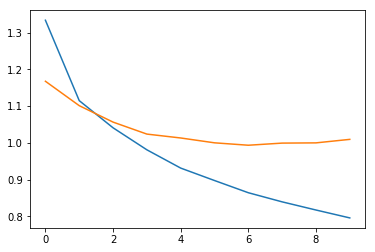

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Simple LSTM

In [0]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(30, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

W0725 14:01:05.984144 140109529372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:01:06.002069 140109529372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:01:06.004803 140109529372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 14:01:06.078225 140109529372544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 14:01:06.086035 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2440, 128)         320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                19080     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 155       
Total params: 339,235
Trainable params: 339,235
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2,batch_size=500)

W0725 14:01:13.135771 140109529372544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30327 samples, validate on 7582 samples
Epoch 1/10
30327/30327 [==============================] - 414s 14ms/step - loss: 1.2565 - acc: 0.5787 - val_loss: 1.1161 - val_acc: 0.5798
Epoch 2/10
30327/30327 [==============================] - 413s 14ms/step - loss: 1.0423 - acc: 0.5942 - val_loss: 1.0033 - val_acc: 0.5942
Epoch 3/10
30327/30327 [==============================] - 414s 14ms/step - loss: 0.9646 - acc: 0.6162 - val_loss: 0.9588 - val_acc: 0.6056
Epoch 4/10
30327/30327 [==============================] - 413s 14ms/step - loss: 0.9146 - acc: 0.6308 - val_loss: 0.9401 - val_acc: 0.6101
Epoch 5/10
30327/30327 [==============================] - 413s 14ms/step - loss: 0.8866 - acc: 0.6406 - val_loss: 0.9335 - val_acc: 0.6161
Epoch 6/10
30327/30327 [==============================] - 373s 12ms/step - loss: 0.8636 - acc: 0.6516 - val_loss: 0.9363 - val_acc: 0.6130
Epoch 7/10
30327/30327 [==============================] - 401s 13ms/step - loss: 0.8410 - acc: 0.6609 - val_loss: 0.9

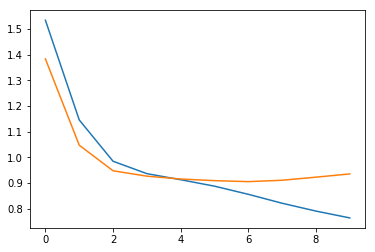

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

##Bidirectional LSTM

In [13]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(Bidirectional(LSTM(30, dropout_U=0.2,dropout_W=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2488, 128)         320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60)                38160     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 305       
Total params: 358,465
Trainable params: 358,465
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.2,batch_size=500)

W0727 15:23:59.649552 140466201745280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 23760 samples, validate on 5940 samples
Epoch 1/10
23760/23760 [==============================] - 525s 22ms/step - loss: 1.3157 - acc: 0.5426 - val_loss: 1.1703 - val_acc: 0.5667
Epoch 2/10
23760/23760 [==============================] - 525s 22ms/step - loss: 1.1160 - acc: 0.5640 - val_loss: 1.0210 - val_acc: 0.5753
Epoch 3/10
23760/23760 [==============================] - 526s 22ms/step - loss: 0.9982 - acc: 0.5936 - val_loss: 0.9990 - val_acc: 0.5870
Epoch 4/10
23760/23760 [==============================] - 524s 22ms/step - loss: 0.9498 - acc: 0.6120 - val_loss: 0.9603 - val_acc: 0.6017
Epoch 5/10
23760/23760 [==============================] - 524s 22ms/step - loss: 0.9185 - acc: 0.6206 - val_loss: 0.9513 - val_acc: 0.6047
Epoch 6/10
23760/23760 [==============================] - 516s 22ms/step - loss: 0.8894 - acc: 0.6318 - val_loss: 0.9402 - val_acc: 0.6104
Epoch 7/10
23760/23760 [==============================] - 519s 22ms/step - loss: 0.8699 - acc: 0.6418 - val_loss: 0.9

In [14]:
history=model.fit(X_train,Y_train,epochs=10,batch_size=500)

Epoch 1/10


ResourceExhaustedError: ignored

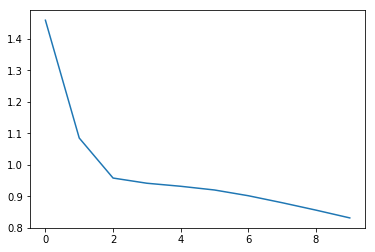

In [0]:
plt.plot(history.history['loss'])